Finding Heavy traffic indicators on I-94

We need to find a few indicators of heavy traffic on highway I-94. These indicators can be weather type, time of the day, time of the week etc. For analysis we will use the data set made by John Hogue.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
traffic = pd.read_csv('./HeavytrafficProject/Metro_Interstate_Traffic_Volume.csv')

In [3]:
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


date_time may be converted to date. There are no null values.

As the observation were taken by by a station located midway between Minneapolis and Saint Paul and only cars moving from east to west are recorded, we have to avoid generalisation.

We will examine 'traffic_volume' column by plotting a histogram

<AxesSubplot: ylabel='Frequency'>

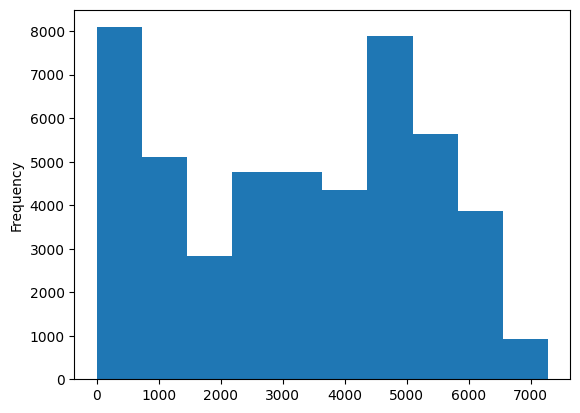

In [5]:
traffic['traffic_volume'].plot.hist()

In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [7]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [8]:
traffic

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


We can see that 25% of times traffic volume is at 1193.00, and 755 of times traffic value is at 4933.00.
We may assume that traffic value depends on time of the day  and on if it is day or night.
For rough splitting the data into day and night traffic we assume that between 7.p.m. and 7.a.m will be night.
We have converted datetime column to datetyme type of data. Next we add column with categorical value - 'day' or 'night'

In [9]:
boolean_day = (traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)

In [10]:
traffic.loc[boolean_day, 'day_time'] = 'day'

In [11]:
traffic.loc[~boolean_day, 'day_time'] = 'night'

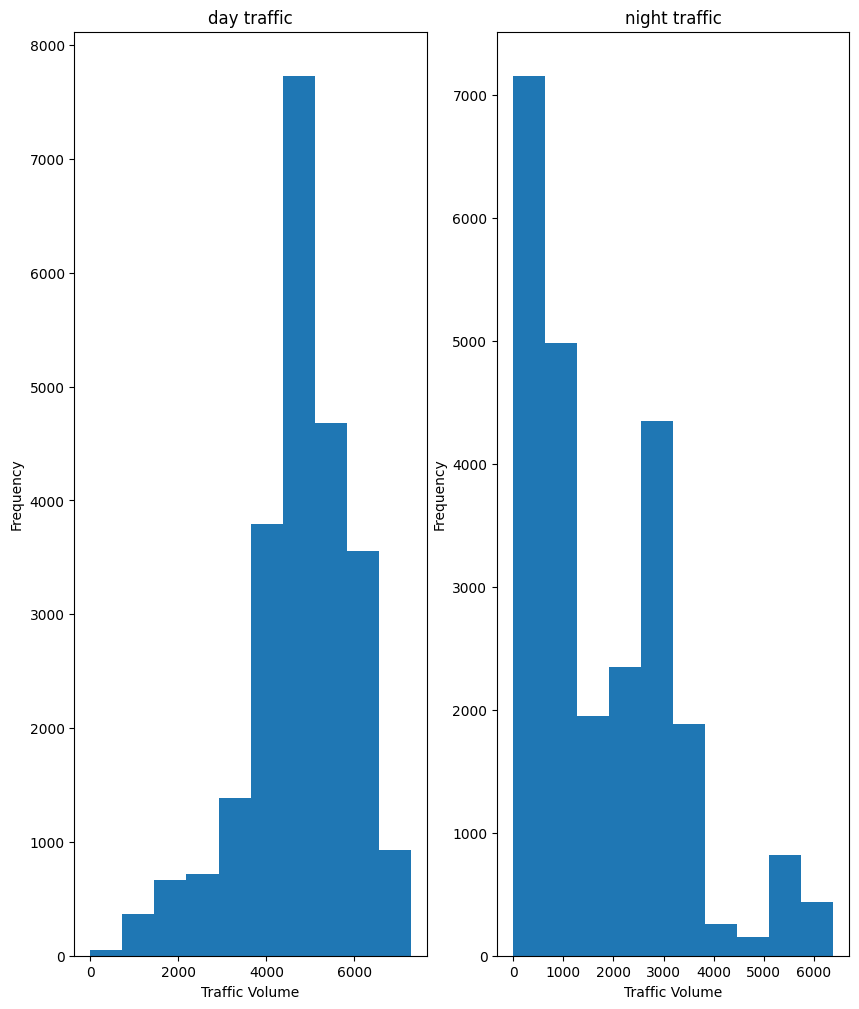

In [12]:
times=['day', 'night']
plt.figure(figsize=(10,12))
for i, t in zip(range(1,3), times):
    traffic_bool = traffic['day_time'] == t
    plt.subplot(1,2,i)
    plt.title(t + ' traffic')
    plt.xlabel('Traffic Volume')
    plt.ylabel('Frequency')
    plt.hist(traffic[traffic_bool]['traffic_volume'])
plt.show()

We can see that heavy traffic load happens most during the day time, and diagram skewed towards increasing traffic. Night traffic histogram shows that most of the time traffic is low with some peaks.

In [13]:
traffic[boolean_day].describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,23877.000000,23877.00000,23877.000000,23877.000000,23877.000000
mean,282.257596,0.53306,0.000253,53.122000,4762.047452
std,13.298885,63.62932,0.008853,37.564588,1174.546482
min,0.000000,0.00000,0.000000,0.000000,0.000000
25%,272.680000,0.00000,0.000000,5.000000,4252.000000
50%,283.780000,0.00000,0.000000,75.000000,4820.000000
75%,293.440000,0.00000,0.000000,90.000000,5559.000000
max,310.070000,9831.30000,0.510000,100.000000,7280.000000


In [14]:
traffic[~boolean_day].describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,24327.000000,24327.000000,24327.000000,24327.000000,24327.000000
mean,280.173600,0.139145,0.000192,45.672011,1785.377441
std,13.296357,1.110872,0.007434,40.048382,1441.951197
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,271.700000,0.000000,0.000000,1.000000,530.000000
50%,281.379000,0.000000,0.000000,40.000000,1287.000000
75%,290.700000,0.000000,0.000000,90.000000,2819.000000
max,307.680000,55.630000,0.510000,100.000000,6386.000000


mean of daily traffic is higher than in the night, roughly during the day traffic volume is 3 times heavier

as we are analysing heavy traffic and looking for its indicators we concentrate our effort on traffic during daytime. Lets look how traffic is changing by month on average.

In [15]:
traffic['month'] = traffic['date_time'].dt.month

In [16]:
by_month = traffic.groupby('month').agg({'traffic_volume' : 'mean'})

In [17]:
by_month.reset_index(inplace=True)

<AxesSubplot: xlabel='month'>

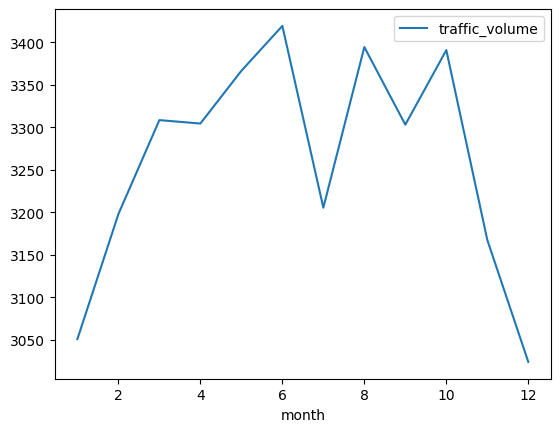

In [18]:
by_month.plot.line(x='month', y='traffic_volume')

traffic volume is growing till the end of May, then gows down till July, then rises and in October starts dropping again. In winter it is low.

<AxesSubplot: xlabel='day_of_week'>

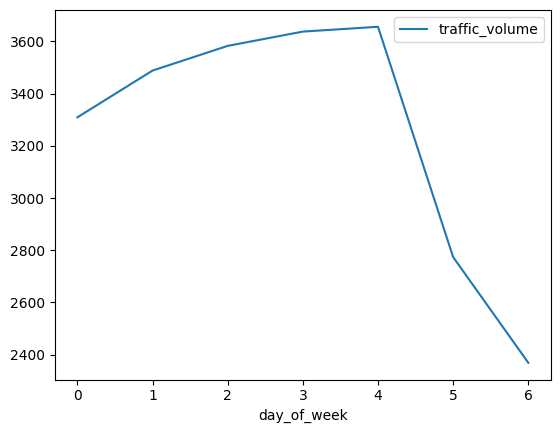

In [19]:
traffic['day_of_week'] = traffic['date_time'].dt.dayofweek
by_day = traffic.groupby('day_of_week').agg({'traffic_volume' : 'mean'})
by_day.reset_index(inplace=True)
by_day.plot.line(x='day_of_week', y='traffic_volume')

the traffic rises slowly till thursday, then abruptly goes down. On weekends is very low.

We will analyse average traffic changes by hour, as on weekends trafic voulme is significatly lower that on business days, we will separate it.

In [20]:
traffic['hour'] = traffic['date_time'].dt.hour

In [21]:
business_days = traffic.copy()[traffic['day_of_week'] <= 4]
weekends = traffic.copy()[traffic['day_of_week'] >= 5]
by_hours_business_days = business_days.groupby('hour').mean()
by_hours_weekends = weekends.groupby('hour').mean()

C:\Users\Yura\AppData\Local\Temp\ipykernel_13288\2417704290.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hours_business_days = business_days.groupby('hour').mean()
C:\Users\Yura\AppData\Local\Temp\ipykernel_13288\2417704290.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hours_weekends = weekends.groupby('hour').mean()


In [24]:
by_hours_business_days.reset_index(inplace=True)
by_hours_weekends.reset_index(inplace=True)

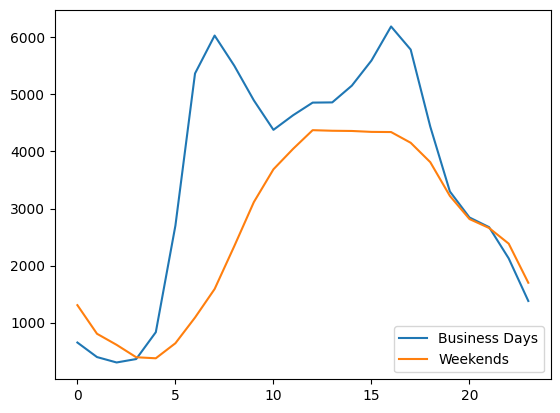

In [25]:
plt.plot(by_hours_business_days['hour'], by_hours_business_days['traffic_volume'], label='Business Days')
plt.plot(by_hours_weekends['hour'], by_hours_weekends['traffic_volume'], label='Weekends')
plt.legend()
plt.show()

There are two peaks on business days - 6 in the morning and 16-17 hours, between these two peaks traffic is somewhat lower. On weekends traffic is heavy between 11 and 16 hours.

On weekend traffic is lower even in rushour that most of the daytime in business days. 

Then we may analyse correlation between traffic and weather conditions. We have the following columns for describing weather - 'temp', 'rain_1h', 'show_1h', 'clouds_all', 'weather_main', 'eather_description'. Exept the last two colimns are numerical.

In [30]:
print(traffic['traffic_volume'].corr(traffic['temp']))

0.13029879817112675


In [31]:
print(traffic['traffic_volume'].corr(traffic['rain_1h']))

0.004713702367859229


In [32]:
print(traffic['traffic_volume'].corr(traffic['snow_1h']))

0.0007334345358283802


In [34]:
print(traffic['traffic_volume'].corr(traffic['clouds_all']))

0.06705377704283517


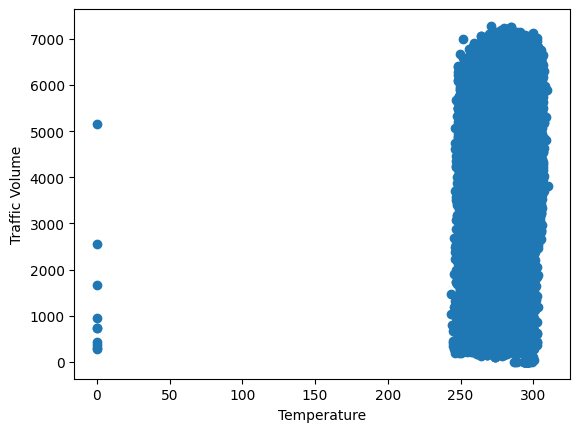

In [36]:
plt.scatter(traffic['temp'], traffic['traffic_volume'])
plt.xlabel('Temperature')
plt.ylabel('Traffic Volume')
plt.show()

such scatter plot doesn't give us insight into correlation between temperature and volume of traffic. There is a low correlation between them. And almost no correlation with outher weather factors.

May be categorical columns describing weather will give us some indicators of heavy traffic

In [40]:
by_weather_main = traffic.groupby('weather_main').agg({'traffic_volume' : 'mean'})
by_weather_main.reset_index(inplace=True)

In [41]:
by_weather_description = traffic.groupby('weather_description').agg({'traffic_volume' : 'mean'})
by_weather_description.reset_index(inplace=True)

<BarContainer object of 11 artists>

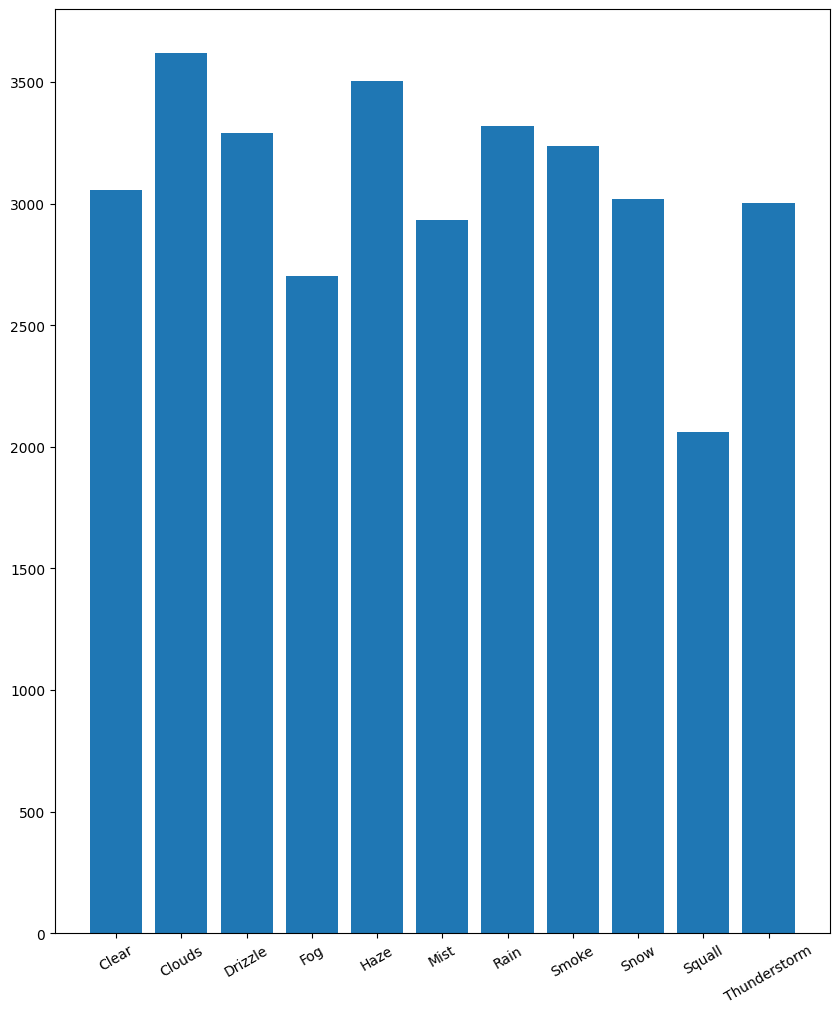

In [45]:
plt.figure(figsize=(10,12))
plt.xticks(rotation=30)
plt.bar(by_weather_main['weather_main'], by_weather_main['traffic_volume'])

<BarContainer object of 38 artists>

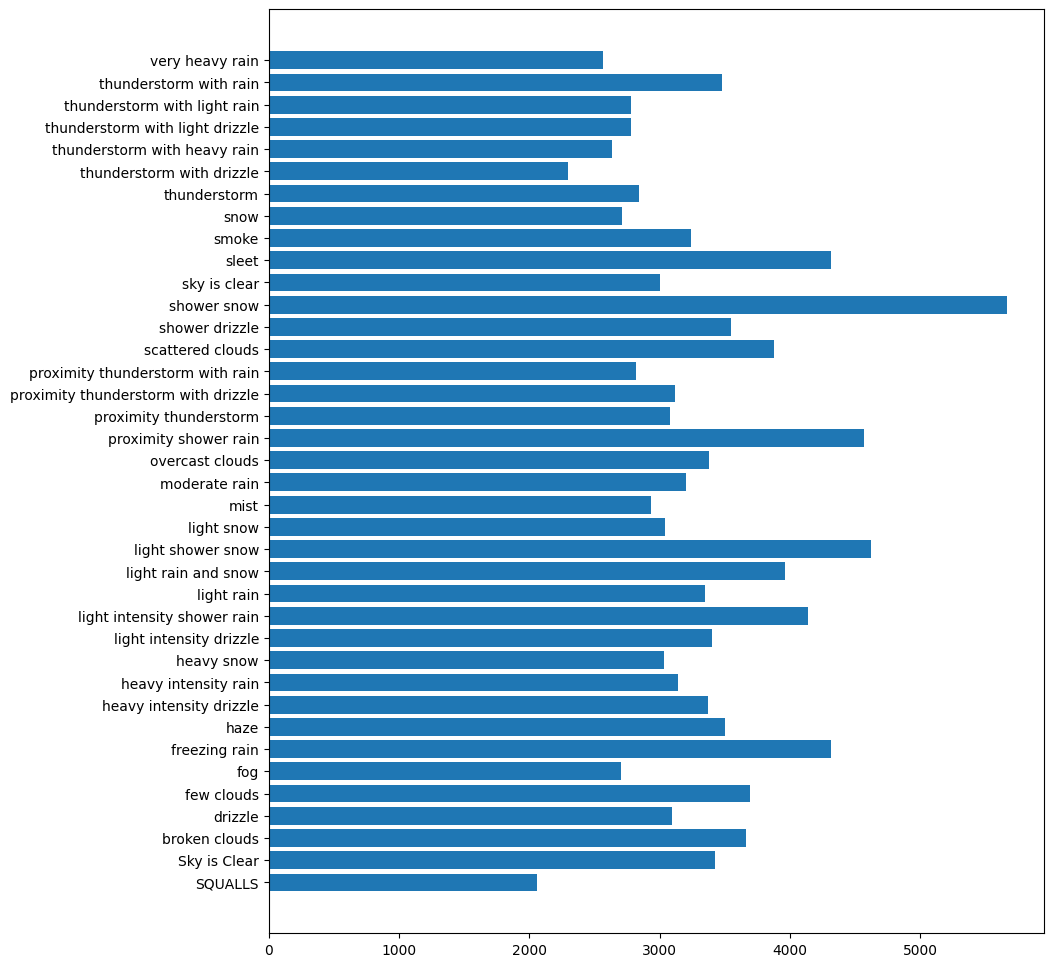

In [58]:
plt.figure(figsize=(10,12))
plt.barh(by_weather_description['weather_description'], by_weather_description['traffic_volume'])

We can see that in extremely bad weather conditions traffic volume is heavier when it is snowing. 'weather_main' is a bad indicator for heavy traffic is clouds can't affect traffic volume as we see on bar plot. Also we don't see any correlation between 'main weather' and 'traffic volume'.

In [ ]:
'weather description' is a good indicator of heavy traffic in addition of day of the week, time of day and temperature.